<a href="https://colab.research.google.com/github/GZanelladev/FirstRepository-for-DIO/blob/main/Teste_AB_Tera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregamento das bibliotecas

In [ ]:
pip install pingouin

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Criando o banco de dados

### Estabelecendo uma semente para a randomização

In [ ]:
np.random.seed(321)

### Estabelecendo parâmetros para os dados que serão gerados

In [ ]:
media_cachorro = 58
media_gato = 53
dp = 15
n_total = 500

### Gerando a randomização do grupo (gato ou cachorro)

In [ ]:
grupo = np.random.binomial(n = 1, p = 0.5, size = n_total)
# 0 = gato; 1 = cachorro

### Criando o escore de 0-100 após o vídeo

In [ ]:
escore = (1-grupo)*np.random.normal(loc = media_gato,
                                    scale = dp, size = n_total) +
grupo*np.random.normal(loc = media_cachorro,
                       scale = dp, size = n_total)

### Unindo o escore e o grupo para criação do dataframe

In [ ]:
df = pd.DataFrame(data = {'grupo': grupo, 'escore': escore})

# Análise descritiva do dataframe

In [ ]:
df.head(10)

,grupo,escore
0,1,75.220998
1,1,56.458337
2,0,56.960214
3,0,71.058133
4,0,12.556875
5,0,28.024040
6,0,53.601469
7,1,31.597717
8,1,54.306039
9,1,30.054805


In [ ]:
df.describe().round(2)

,grupo,escore
count,500.00,500.00
mean,0.49,54.86
std,0.50,15.21
min,0.00,11.42
25%,0.00,44.44
50%,0.00,55.27
75%,1.00,65.22
max,1.00,94.54


In [ ]:
df.groupby('grupo').describe().round(2)

escore                                                 
       count   mean    std    min    25%    50%    75%    max
grupo                                                        
0      253.0  52.87  14.84  12.56  42.99  52.87  62.53  94.18
1      247.0  56.90  15.34  11.42  47.28  57.58  66.99  94.54

### Histograma por grupo

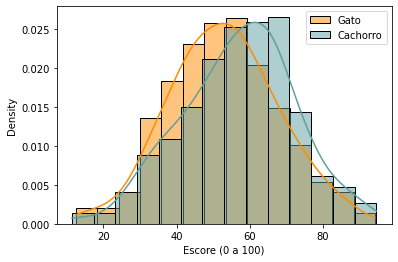

In [ ]:
sns.histplot(df[df['grupo'] == 0]['escore'], label = 'Gato', stat = "density", color="darkorange", kde=True)
sns.histplot(df[df['grupo'] == 1]['escore'], label = 'Cachorro', stat = "density", color="cadetblue", kde=True)
plt.xlabel('Escore (0 a 100)')
plt.legend()
plt.show()

# Comparação entre os grupos por teste-t independente

Vamos comparar as médias dos escores dos dois grupos. São estatisticamente diferentes?

In [ ]:
from scipy.stats import ttest_ind
# Importando a função que realiza o teste-t para amostras independentes

In [ ]:
stat, p = ttest_ind(df[df['grupo'] == 0]['escore'], df[df['grupo'] == 1]['escore'])

In [ ]:
print('stat=%.3f, p=%.3f' % (stat, p))

stat=-2.979, p=0.003


Estabelecendo o nível de significância como 5%, como p < 0,05, vamos considerar que há diferença entre os grupos.
Sabendo (pela análise descritiva) que a média do comercial com gatos é inferior à média do comercial com cachorros, podemos dizer que o comercial com cachorros induz a um escore de intenção de adoção estatisticamente superior ao comercial com gatos.

#### Outra opção: com a biblioteca pingouin (output mais completo)

In [ ]:
import pingouin as pg

In [ ]:
pg.ttest(df[df['grupo'] == 0]['escore'], df[df['grupo'] == 1]['escore'], correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.979398,498,two-sided,0.003029,"[-6.67, -1.37]",0.266505,7.205,0.844633
